# Android ransomware

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.manifold import Isomap
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
%matplotlib inline
import warnings
warnings.filterwarnings(action = 'ignore')

In [61]:
dataSet = pd.read_csv('dataset/transformed_train_df.csv', encoding = 'unicode_escape')

In [62]:
dataSet.info()
print("Sample data points from the dataset")
dataSet.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313627 entries, 0 to 313626
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   FAMD_Component_1   313627 non-null  float64
 1   FAMD_Component_2   313627 non-null  float64
 2   FAMD_Component_3   313627 non-null  float64
 3   FAMD_Component_4   313627 non-null  float64
 4   FAMD_Component_5   313627 non-null  float64
 5   FAMD_Component_6   313627 non-null  float64
 6   FAMD_Component_7   313627 non-null  float64
 7   FAMD_Component_8   313627 non-null  float64
 8   FAMD_Component_9   313627 non-null  float64
 9   FAMD_Component_10  313627 non-null  float64
 10  FAMD_Component_11  313627 non-null  float64
 11  FAMD_Component_12  313627 non-null  float64
 12  FAMD_Component_13  313627 non-null  float64
 13  FAMD_Component_14  313627 non-null  float64
 14  FAMD_Component_15  313627 non-null  float64
 15  FAMD_Component_16  313627 non-null  float64
 16  FA

,FAMD_Component_1,FAMD_Component_2,FAMD_Component_3,FAMD_Component_4,FAMD_Component_5,FAMD_Component_6,FAMD_Component_7,FAMD_Component_8,FAMD_Component_9,FAMD_Component_10,...,FAMD_Component_12,FAMD_Component_13,FAMD_Component_14,FAMD_Component_15,FAMD_Component_16,FAMD_Component_17,FAMD_Component_18,FAMD_Component_19,FAMD_Component_20,Label
0,1.159860,-1.137678,4.466658,1.470095,-0.084904,2.158798,-2.801462,0.754955,-0.664978,-0.576842,...,0.078739,0.060634,0.068731,0.664680,-0.113278,-0.066584,0.333080,0.174933,0.159136,Benign
1,1.149460,-1.188577,-7.934534,8.735732,3.640803,-1.384045,-2.374773,-0.234244,0.346913,0.314857,...,-0.101929,0.048902,0.492341,0.562892,1.643216,-1.250156,-0.040728,-0.081074,-0.201267,Benign
2,1.160787,-1.192777,-7.940798,8.719191,3.761521,-1.074641,-2.232508,-0.189872,0.085965,0.068831,...,-0.293655,-0.005538,0.485875,0.672605,1.718518,-0.976387,-0.456943,-0.341419,-0.139144,Benign
3,1.111856,-1.082249,2.674097,0.316319,0.198176,0.508622,-2.134621,0.446632,0.394315,0.390091,...,0.792046,-0.682007,-0.079451,0.126557,0.726853,1.115189,-1.294194,0.699751,-0.055606,Benign
4,1.149678,-1.187186,-7.949306,8.745446,3.647240,-1.378491,-2.381798,-0.228476,0.363864,0.330884,...,-0.110627,0.047440,0.455616,0.535578,1.525171,-1.194465,-0.022583,-0.068391,-0.202523,Benign


In [63]:
print("Stats about non-numeric values")
print(dataSet.describe(include = "object"))

print("Stats about numeric values")
print(dataSet.describe(include = "number"))

Stats about non-numeric values
         Label
count   313627
unique      11
top     SVpeng
freq     43394
Stats about numeric values
       FAMD_Component_1  FAMD_Component_2  FAMD_Component_3  FAMD_Component_4  \
count      3.136270e+05      3.136270e+05      3.136270e+05      3.136270e+05   
mean       6.434208e-17     -2.675181e-16      5.595042e-16      1.758079e-16   
std        1.194943e+01      1.047983e+01      3.944275e+00      3.656958e+00   
min       -1.437031e+02     -1.540237e+00     -1.728032e+01     -4.271872e+00   
25%        9.103519e-01     -1.125784e+00     -1.653792e+00     -3.126784e+00   
50%        1.064315e+00     -1.074327e+00     -3.174490e-01     -1.060153e+00   
75%        1.111014e+00     -1.007717e+00      2.942046e+00      1.492181e+00   
max        4.556965e+00      1.110664e+02      2.991723e+01      5.997328e+01   

       FAMD_Component_5  FAMD_Component_6  FAMD_Component_7  FAMD_Component_8  \
count      3.136270e+05      3.136270e+05      3.136270e

Target variable "Label" distribution


<Axes: xlabel='Label', ylabel='Count'>

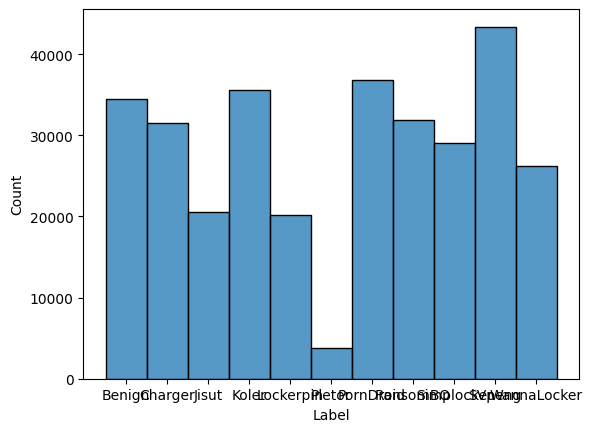

In [64]:
print("Target variable \"Label\" distribution")
sns.histplot(data = dataSet, x = "Label")

In [65]:

def convert_categorical_to_numeric(df):

    df = df.copy()
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    
    #Assigns each category a unique

    for col in categorical_cols:
        unique_values = df[col].unique()
        mapping = {value: idx for idx, value in enumerate(unique_values)}
        df[col] = df[col].map(mapping)
    
    return df

In [66]:
categorical_df = convert_categorical_to_numeric(dataSet)

<Axes: >

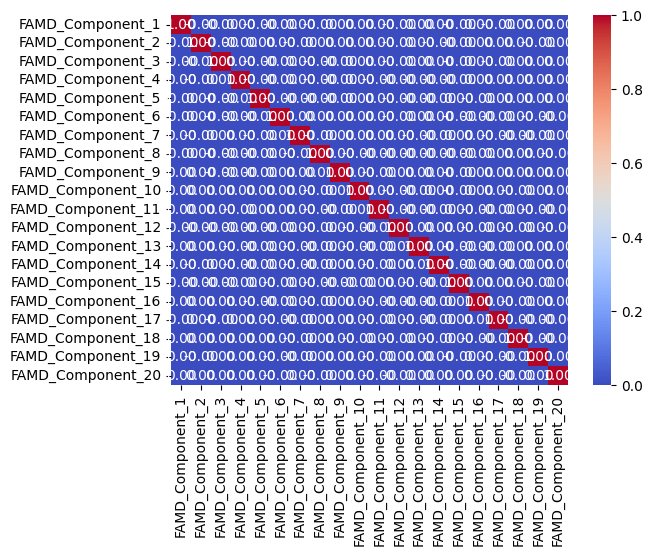

In [67]:
corelations = categorical_df.iloc[:,:20].select_dtypes(include = "number").corr()
sns.heatmap(corelations, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

<Axes: >

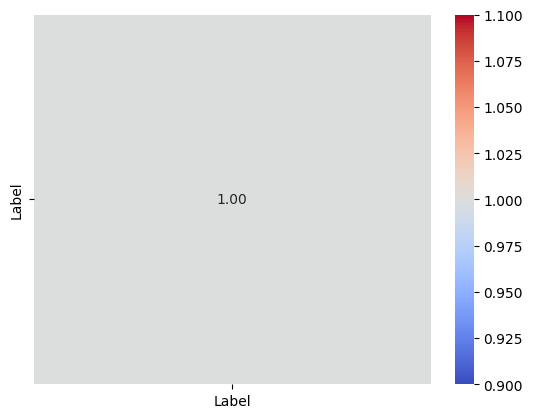

In [68]:
corelations = categorical_df.iloc[:,20:40].select_dtypes(include = "number").corr()
sns.heatmap(corelations, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

In [69]:
corelations = categorical_df.iloc[:,40:60].select_dtypes(include = "number").corr()
sns.heatmap(corelations, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

ValueError: zero-size array to reduction operation fmin which has no identity

<Axes: >

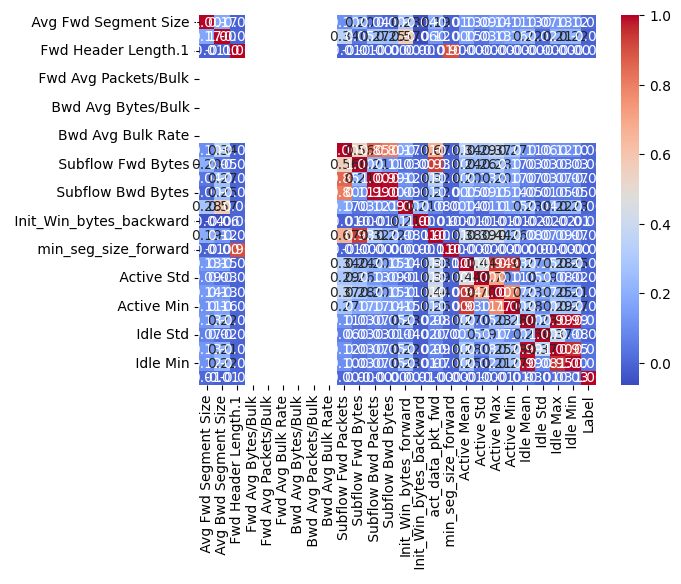

In [ ]:
corelations = categorical_df.iloc[:,60:dataSet.shape[1]].select_dtypes(include = "number").corr()
sns.heatmap(corelations, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

In [ ]:
#Plotting heat map of highly correlated data only
corr_matrix = categorical_df.corr()

threshold = 0.7

# Select high-correlation pairs
high_corr_pairs = {}
high_corr_cols = {}
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            high_corr_pairs[(corr_matrix.columns[i], corr_matrix.columns[j])] = abs(corr_matrix.iloc[i, j])
            high_corr_cols[corr_matrix.columns[i]] = 0

print(high_corr_pairs)
print(high_corr_cols)

{('Flow ID', ' Timestamp'): np.float64(0.8461098422929735), ('Flow ID', 'Label'): np.float64(0.9501027128495259), (' Timestamp', 'Label'): np.float64(0.8835028233985618), (' Flow Duration', ' Flow IAT Std'): np.float64(0.7089436691554866), (' Flow Duration', ' Flow IAT Max'): np.float64(0.92094991766757), (' Flow Duration', 'Fwd IAT Total'): np.float64(0.8166798610776186), (' Flow Duration', ' Fwd IAT Max'): np.float64(0.7213595034184856), (' Flow Duration', 'Bwd IAT Total'): np.float64(0.7570146299728296), (' Flow Duration', ' Bwd IAT Max'): np.float64(0.7138594068865542), (' Flow Duration', 'Idle Mean'): np.float64(0.767063426332098), (' Flow Duration', ' Idle Max'): np.float64(0.799739843672003), (' Flow Duration', ' Idle Min'): np.float64(0.7207388910448742), (' Total Fwd Packets', ' Total Backward Packets'): np.float64(0.8537806840593297), (' Total Fwd Packets', ' Total Length of Bwd Packets'): np.float64(0.8011486591700301), (' Total Fwd Packets', 'Subflow Fwd Packets'): np.float

In [ ]:
cols_to_keep = high_corr_cols.keys()

reduced_df = categorical_df[cols_to_keep]

print(reduced_df.shape)

(392034, 43)


<Axes: >

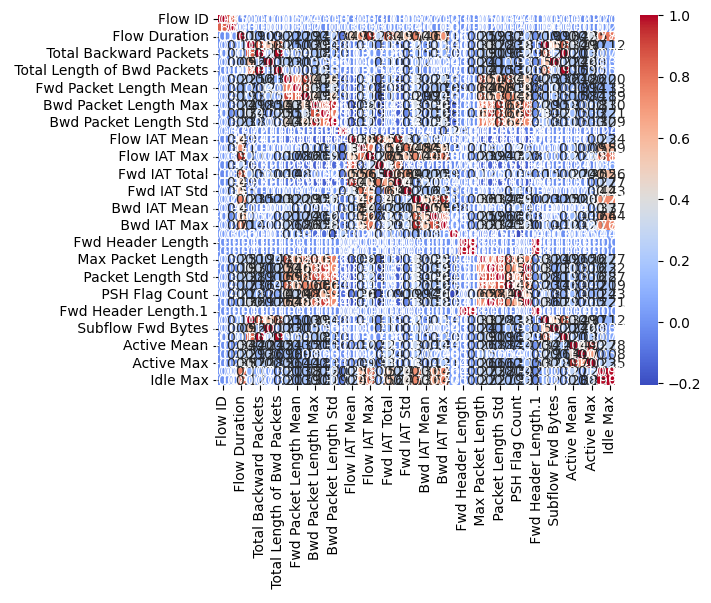

In [ ]:
corelations = reduced_df.select_dtypes(include = "number").corr()
sns.heatmap(corelations, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

In [ ]:
reduced_df['Label'] = dataSet['Label']
reduced_df.to_csv('ransomware_reduced.csv')

In [ ]:
#Performing pca to plot the data
def perform_pca(df, n_components=2):

    standardized_data = (df - df.mean()) / df.std() #Standardizing data

    covariance_matrix = np.cov(standardized_data.T) #Covariance matrix

    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    selected_eigenvectors = sorted_eigenvectors[:, :n_components]

    pca_result = np.dot(standardized_data, selected_eigenvectors)

    # Return as a DataFrame
    columns = [f'PC{i+1}' for i in range(n_components)] #Name columns as per PCi, where i
    return pd.DataFrame(pca_result, columns=columns)


PCA Result:
        PC1
0 -3.203349
1  2.045004
2  2.115246
3  1.997923
4 -0.242812


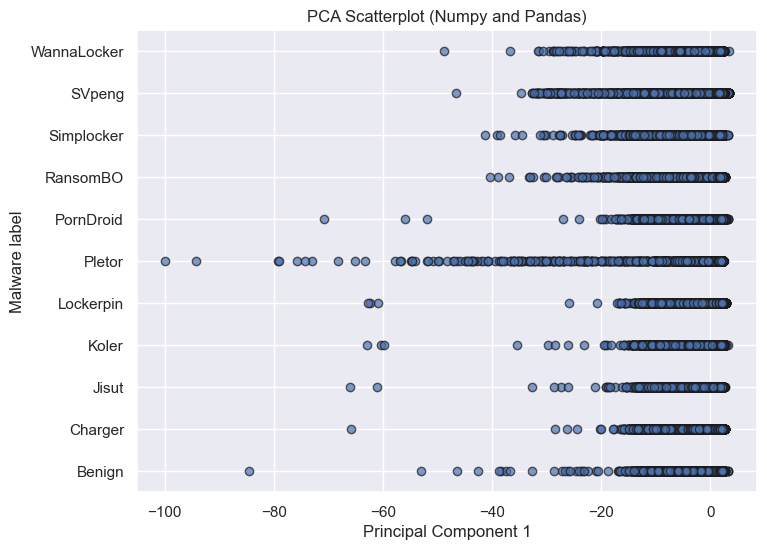

In [ ]:
pca_df = perform_pca(reduced_df, n_components=1)
print("PCA Result:")
print(pca_df.head())

pca_df['Label'] = dataSet['Label']
# Scatterplot
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['Label'], alpha=0.7, edgecolor='k')
plt.title("PCA Scatterplot (Numpy and Pandas)")
plt.xlabel("Principal Component 1")
plt.ylabel("Malware label")
plt.grid(True)
plt.show()


PCA Result:
        PC1       PC2
0 -3.203349  3.254819
1  2.045004  0.188131
2  2.115246  0.175546
3  1.997923  0.206797
4 -0.242812  1.506462


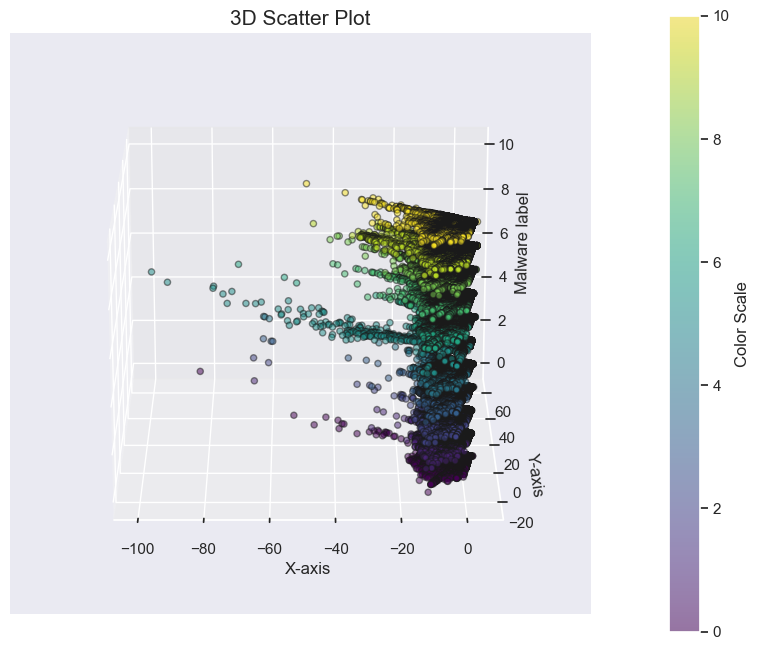

In [ ]:
pca_3d = perform_pca(reduced_df, n_components=2)
print("PCA Result:")
print(pca_3d.head())

pca_3d['Label'] = categorical_df['Label']

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(pca_3d['PC1'], pca_3d['PC2'], pca_3d['Label'], c=pca_3d['Label'], cmap='viridis', s=20, alpha=0.5, edgecolor='k')

# Add labels
ax.set_title("3D Scatter Plot", fontsize=15)
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Malware label")

ax.view_init(elev=20, azim=270)  # Elevation and Azimuth

# Add a color bar to indicate color mapping
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Color Scale')

# Show plot
plt.show()